In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

dir_path = 'data/scsn/'

In [2]:
proj_list = ['0', '0.1', '0.5', '1',
             '1.5', '2', '2.5', '3',
             '3.5', '4', '4.5', '5']
SCLE=[]
RCTD=[]
spatialDWLS=[]
SPOTLight=[]
cell2location=[]
cellDART=[]
truth_list=[]
rmse_SCLE=[]
rmse_RCTD=[]
rmse_spatialDWLS=[]
rmse_SPOTLight=[]
rmse_cell2location=[]
rmse_cellDART=[]

for name in proj_list:
    truth = pd.read_csv(dir_path+'scsn_noise/proportions.3000_scsn_sc_1_10_4_'+name+'.tsv', header=0, index_col=0, sep='\t')
    pre_scle = pd.read_csv(dir_path+'SCLE/SCLE_predict_'+name+'.csv', header=0, index_col=0)
    pre_rctd = pd.read_csv(dir_path+'rctd/rctd_4_'+name+'.csv', header=0, index_col=0)
    pre_dwls = pd.read_csv(dir_path+'dwls/dwls_4_'+name+'.csv', header=0, index_col=1)
    pre_dwls.drop(columns='Unnamed: 0', inplace=True)
    pre_spot = pd.read_csv(dir_path+'spotlight/spot_4_'+name+'.csv', header=0, index_col=0)
    pre_spot.drop(columns='res_ss', inplace=True)
    pre_spot.index=truth.index
    pre_cell2loc = pd.read_csv(dir_path+'cell2loc/cell2loc_'+name+'.csv', header=0, index_col=0)
    pre_cell2loc.columns = truth.columns
    pre_cell2loc = pre_cell2loc.div(pre_cell2loc.sum(axis=1), axis=0)
    pre_cellDART = pd.read_csv(dir_path+'cellDART/cellDART_'+name+'.csv', header=0, index_col=0)
#     pre_cellDART = pd.read_csv('D:/lhj/study/Code/CellDART-master/CellDART/CellDART_output/cellDART_'+name+'.csv', header=0, index_col=0)
#     pre_cellDART.columns = [s[:s.index('_')] for s in pre_cellDART.columns]
    pre_cellDART = pre_cellDART[truth.columns]
    SCLE.append(pre_scle)
    RCTD.append(pre_rctd)
    spatialDWLS.append(pre_dwls)
    SPOTLight.append(pre_spot)
    cell2location.append(pre_cell2loc)
    cellDART.append(pre_cellDART)
    truth_list.append(truth)
    rmse_SCLE.append(math.sqrt(mean_squared_error(truth.values, pre_scle.values)))
    rmse_RCTD.append(math.sqrt(mean_squared_error(truth.values, pre_rctd.values)))
    rmse_spatialDWLS.append(math.sqrt(mean_squared_error(truth.values, pre_dwls.values)))
    rmse_SPOTLight.append(math.sqrt(mean_squared_error(truth.values, pre_spot.values)))
    rmse_cell2location.append(math.sqrt(mean_squared_error(truth.values, pre_cell2loc.values)))
    rmse_cellDART.append(math.sqrt(mean_squared_error(truth.values, pre_cellDART.values)))

    


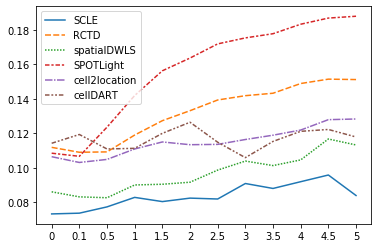

In [3]:
df = pd.DataFrame({
                   'SCLE':rmse_SCLE, 
                   'RCTD':rmse_RCTD, 
                   'spatialDWLS':rmse_spatialDWLS, 
                   'SPOTLight':rmse_SPOTLight, 
                   'cell2location':rmse_cell2location, 
                   'cellDART':rmse_cellDART
})
df.index=proj_list
# fig=setfig(1)
sns.lineplot(data=df)
plt.savefig('E:/360MoveData/Users/93109/Desktop/数据/scsn/折线图.pdf')
plt.show()

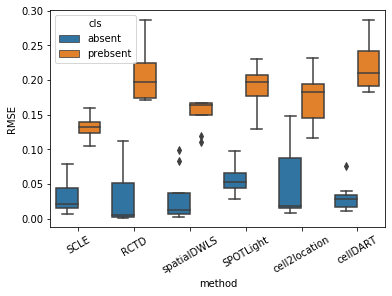

In [4]:
methods = ['SCLE', 'RCTD', 'spatialDWLS', 'SPOTLight', 'cell2location', 'cellDART']
true=truth_list[0]
i=0
res=None
for df in [SCLE[0], RCTD[0], spatialDWLS[0], SPOTLight[0], cell2location[0], cellDART[0]]:
    mse_absent=[]
    mse_prebsent=[]
    for cell_type in ['Astrocytes'	,'Bergmann',	'Choroid',	'Endothelial',	'Granule',	'Microglia',	'Oligodendrocytes',	'Purkinje']:

        prebsent = true[true[cell_type]>0]
        absent = true[true[cell_type]==0]
        scle_absent = df.loc[absent.index]
        scle_prebsent = df.loc[prebsent.index]

        mse_absent.append(math.sqrt(mean_squared_error(absent[cell_type].values, scle_absent[cell_type].values)))
        mse_prebsent.append(math.sqrt(mean_squared_error(prebsent[cell_type].values, scle_prebsent[cell_type].values)))
    # print(mse_absent)
    # print(mse_prebsent)
    new = pd.DataFrame({'RMSE': mse_absent, 'cls': 'absent', 'method': methods[i]})

    new = new.append(pd.DataFrame({'RMSE':mse_prebsent,'cls':'prebsent','method':methods[i]}))

    if res is not None:
        res = res.append(new)
    else:
        res=new
    i+=1
ax = sns.boxplot(x='method',y='RMSE',data=res, hue='cls')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.savefig('data/scsn/特异性和敏感性测试.pdf')

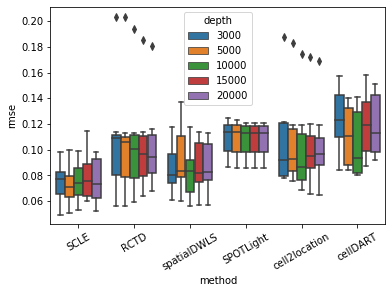

In [5]:
depth = ['3000', '5000', '10000', '15000', '20000']
SCLE=[]
RCTD=[]
spatialDWLS=[]
SPOTLight=[]
cell2location=[]
cellDART=[]
res=None
truth = pd.read_csv(dir_path+'scsn_noise/proportions.3000_scsn_sc_1_10_4_0.tsv', header=0, index_col=0, sep='\t')
for name in depth:
    pre_scle = pd.read_csv(dir_path+'SCLE/SCLE_predict_d_'+name+'.csv', header=0, index_col=0)
    pre_rctd = pd.read_csv(dir_path+'rctd/rctd_d_'+name+'.csv', header=0, index_col=0)
    pre_dwls = pd.read_csv(dir_path+'dwls/dwls_d_'+name+'.csv', header=0, index_col=1)
    pre_dwls.drop(columns='Unnamed: 0', inplace=True)
    pre_spot = pd.read_csv(dir_path+'spotlight/spot_d_'+name+'.csv', header=0, index_col=0)
    pre_spot.drop(columns='res_ss', inplace=True)
    pre_spot.index=truth.index
    pre_cell2loc = pd.read_csv(dir_path+'cell2loc/cell2loc_d_'+name+'.csv', header=0, index_col=0)
    pre_cell2loc.columns = truth.columns
    pre_cell2loc = pre_cell2loc.div(pre_cell2loc.sum(axis=1), axis=0)
    pre_cellDART = pd.read_csv(dir_path+'cellDART/cellDART_d_'+name+'.csv', header=0, index_col=0)
    pre_cellDART.columns = [s[:s.index('_')] for s in pre_cellDART.columns]
    pre_cellDART = pre_cellDART[truth.columns]
    SCLE.append(pre_scle)
    RCTD.append(pre_rctd)
    spatialDWLS.append(pre_dwls)
    SPOTLight.append(pre_spot)
    cell2location.append(pre_cell2loc)
    cellDART.append(pre_cellDART)
for i in range(len(depth)):
    for j,pred in enumerate([SCLE[i], RCTD[i],spatialDWLS[i], SPOTLight[i], cell2location[i], cellDART[i]]):
        rmse=[]
        for cell_type in ['Astrocytes'	,'Bergmann',	'Choroid',	'Endothelial',	'Granule',	'Microglia',	'Oligodendrocytes',	'Purkinje']:
            rmse.append(math.sqrt(mean_squared_error(truth[cell_type].values, pred[cell_type].values)))

        new = pd.DataFrame({'rmse': rmse, 'depth': depth[i], 'method': methods[j]})

#         new = new.append(pd.DataFrame({'rmse':mse_prebsent,'cls':'prebsent','method':methods[i]}))

        if res is not None:
            res = res.append(new)
        else:
            res=new
        
ax = sns.boxplot(x='method',y='rmse',data=res, hue='depth')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.savefig('scsn/depth.pdf')

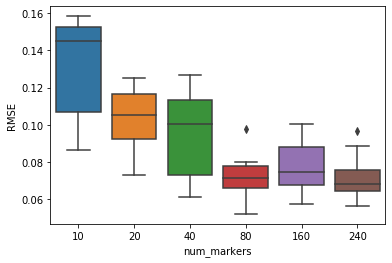

In [6]:
markers = ['10', '20', '40', '80', '160','240']
SCLE=[]
res=None
truth = pd.read_csv(dir_path+'scsn_noise/proportions.3000_scsn_sc_1_10_4_0.tsv', header=0, index_col=0, sep='\t')
for name in markers:
    pre_scle = pd.read_csv(dir_path+'SCLE/SCLE_predict_m_'+name+'.csv', header=0, index_col=0)
    SCLE.append(pre_scle)

for i,pred in enumerate(SCLE):
    rmse=[]
    for cell_type in ['Astrocytes'	,'Bergmann',	'Choroid',	'Endothelial',	'Granule',	'Microglia',	'Oligodendrocytes',	'Purkinje']:
        rmse.append(math.sqrt(mean_squared_error(truth[cell_type].values, pred[cell_type].values)))

    new = pd.DataFrame({'RMSE': rmse, 'num_markers': markers[i]})

#         new = new.append(pd.DataFrame({'rmse':mse_prebsent,'cls':'prebsent','method':methods[i]}))

    if res is not None:
        res = res.append(new)
    else:
        res=new
        
ax = sns.boxplot(x='num_markers',y='RMSE',data=res)
# plt.show()
plt.savefig('scsn/num_marker.pdf')

In [93]:
true = pd.read_csv('D:/lhj/study/Code/SCLE-master/data/scsn/scsn_noise/proportions.3000_scsn_sc_1_10_4_0.tsv', header=0, index_col=0, sep='\t')
pred = pd.read_csv('D:/lhj/study/Code/CellDART-master/CellDART/CellDART_output/cellDART_0.csv', header=0, index_col=0)
# pred = pd.read_csv('D:/lhj/study/Code/SCLE-master/data/scsn/CellDART/cellDART_2.csv', header=0, index_col=0)
# pred.columns = [s[:s.index('_')] for s in pred.columns]
# pred = pred[truth.columns]
math.sqrt(mean_squared_error(true.values, pred.values))

0.1143061598820541

In [7]:
import random
def draw_batch(batch1, batch2, label1, label2, tag):
        ann_fake = sc.AnnData(batch1)
        ann_real = sc.AnnData(batch2)
        
        ann_fake.obs_names = label1.index.values
        ann_real.obs_names = label2.index.values
        
        ann_fake.obs[label1.columns.values] = label1
        ann_real.obs[label2.columns.values] = label2
        
        # print(label1)        
        ann_fake.obs['label'] = pd.Categorical(np.argmax(label1.values,axis=1))
        ann_real.obs['label'] = pd.Categorical(np.argmax(label2.values,axis=1))
        new = ann_fake.concatenate(ann_real, join='inner')
        # new.obs['label'] = pd.Categorical(new.obs['label'])
        sc.tl.pca(new, svd_solver='arpack')
        # sc.pl.pca(new, color='batch')
        
        sc.pp.neighbors(new,n_neighbors=25)
        ng = new.obsp['connectivities']
        neighbors = top_n_idx_sparse(ng, 20)
        qb0 = new.obs['batch'].value_counts()[0] / new.n_obs
        qb1 = new.obs['batch'].value_counts()[1] / new.n_obs
        kl_res = []
        for _ in range(20):
            exm = random.sample(range(10000, 13000), 100)
            ans = []
            n0=0
            n1=0
            for i in exm:
                neigh = new[neighbors[i], :]
                new1 = neigh[neigh.obs['label']==new[i].obs['label'].values[0]]
                if new1.n_obs==0:
                    continue
                pb0 = 1 - sum(list(map(int, new1.obs['batch'].tolist()))) / new1.n_obs
                pb1 = 1-pb0
                if pb0==0:
                    n0+=1
                    kl = pb1 * np.log(pb1 / qb1)
                elif pb1==0:
                    n1+=1
                    kl = pb0 * np.log(pb0 / qb0)
                else:
                    kl = pb0 * np.log(pb0 / qb0) + pb1 * np.log(pb1 / qb1)
                ans.append(kl)
            kl_res.append(np.mean(ans))

        # print(pb)
        # qb=new.obs['batch'].value_counts()
        # sc.tl.umap(new)
        # sc.pl.umap(new, color=['batch'])
        # sc.pl.umap(new, color=['Astrocytes', 'Bergmann', 'Choroid', 'Endothelial', 'Granule', 'Microglia', 'Oligodendrocytes', 'Purkinje'])
        sc.tl.tsne(new)
        sc.pl.tsne(new, color=['batch'],show=False)
        plt.savefig('scsn/batch_'+tag+'.pdf')
        sc.pl.tsne(new, color=['label'],show=False)
        plt.savefig('scsn/main_label_'+tag+'.pdf')
        sc.pl.tsne(new,
                   color=['Astrocytes', 'Bergmann', 'Choroid', 'Endothelial', 'Granule', 'Microglia', 'Oligodendrocytes',
                          'Purkinje'],show=False)
        plt.savefig('scsn/label_'+tag+'.pdf')
        # sc.pl.tsne(new,
        #            color=['Ex_1_L5_6','Ex_2_L5','Ex_3_L4_5', 'Ex_4_L_6', 'Ex_5_L5', 'Ex_6_L4_6', 'Ex_7_L4_6', 'Ex_8_L5_6','Ex_9_L5_6','Ex_10_L2_4'])
        return kl_res
    
    
def top_n_idx_sparse(matrix, n):
    '''Return index of top n values in each row of a sparse matrix'''
    top_n_idx = []
    for le, ri in zip(matrix.indptr[:-1], matrix.indptr[1:]):
        n_row_pick = min(n, ri - le)
        top_n_idx.append(matrix.indices[le + np.argpartition(matrix.data[le:ri], -n_row_pick)[-n_row_pick:]])
    return top_n_idx

In [8]:
scd = np.load('data/scsn/SCLE/z_sc.npy')
z_sim = np.load('data/scsn/SCLE/z_sim.npy')
z_sp = np.load('data/scsn/SCLE/z_sp.npy')
sim = np.load('data/scsn/SCLE/sim.npy')
sp = np.load('data/scsn/SCLE/sp.npy')
label_sp = pd.read_csv('data/scsn/scsn_noise/proportions.3000_scsn_sc_1_10_4_0.tsv', header=0, index_col=0, sep='\t')
label_sim = pd.read_csv('train_data/scsn/proportions.10000_scsn_1_10.tsv', header=0, index_col=0, sep='\t')
raw = sc.read('train_data/scsn/counts.10000_scsn_1_10.h5ad')
raw_sp = sc.read('data/scsn/scsn_noise/counts.3000_scsn_sc_1_10_4_0.h5ad')

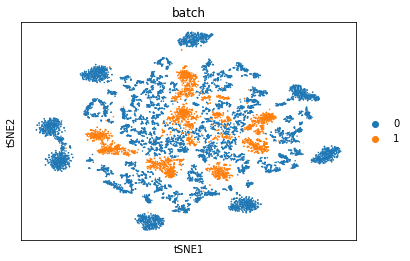

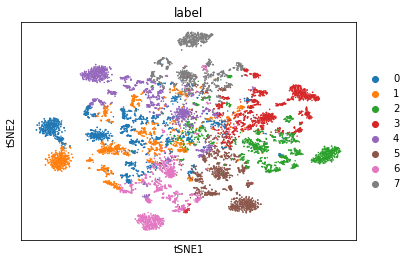

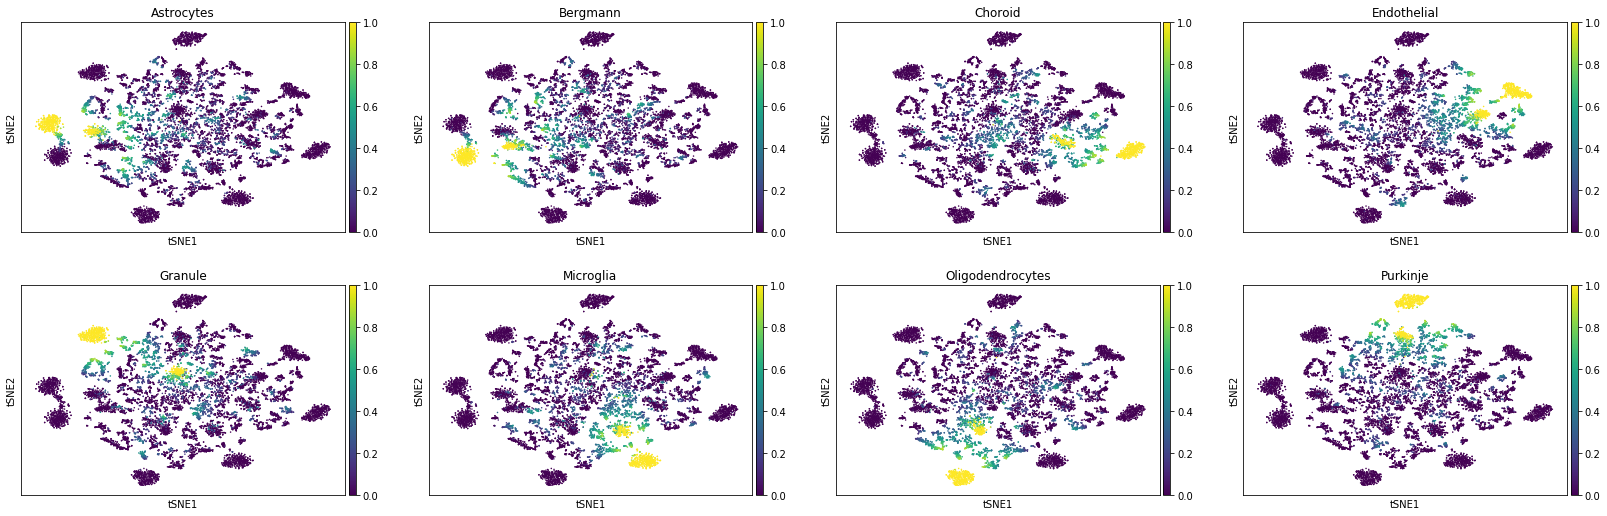

In [17]:
scle_kl = draw_batch(sim,sp,label_sim, label_sp, 'scle_pre')

In [9]:
cellDART_sim = np.load('data/scsn/cellDART/sim.npy')
cellDART_sp = np.load('Ddata/scsn/cellDART/sp.npy')
cellDART_zsim = np.load('data/scsn/cellDART/z_sim.npy')
cellDART_zsp = np.load('data/scsn/cellDART/z_sp.npy')

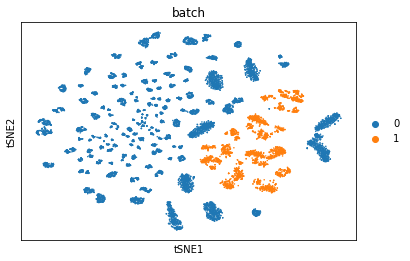

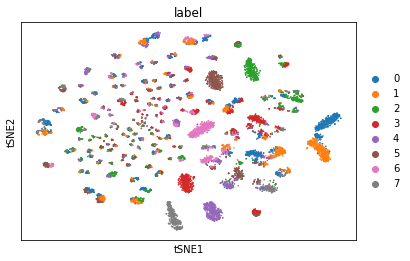

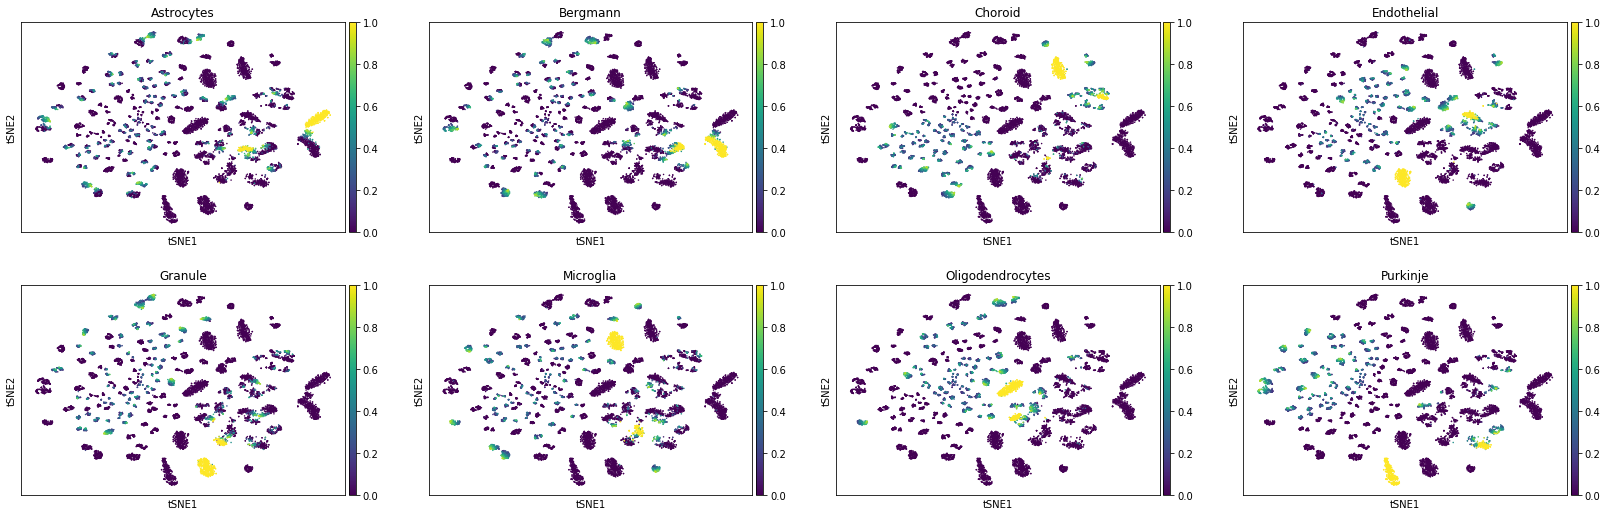

In [19]:
cellDART_kl = draw_batch(cellDART_sim,cellDART_sp,label_sim, label_sp, 'cellDART_pre')

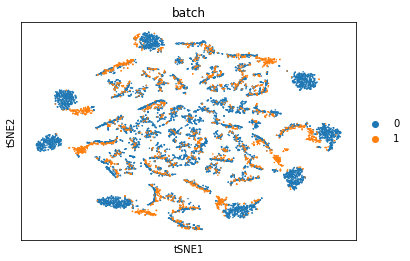

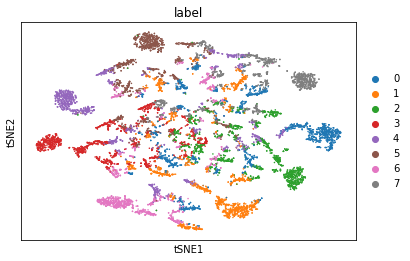

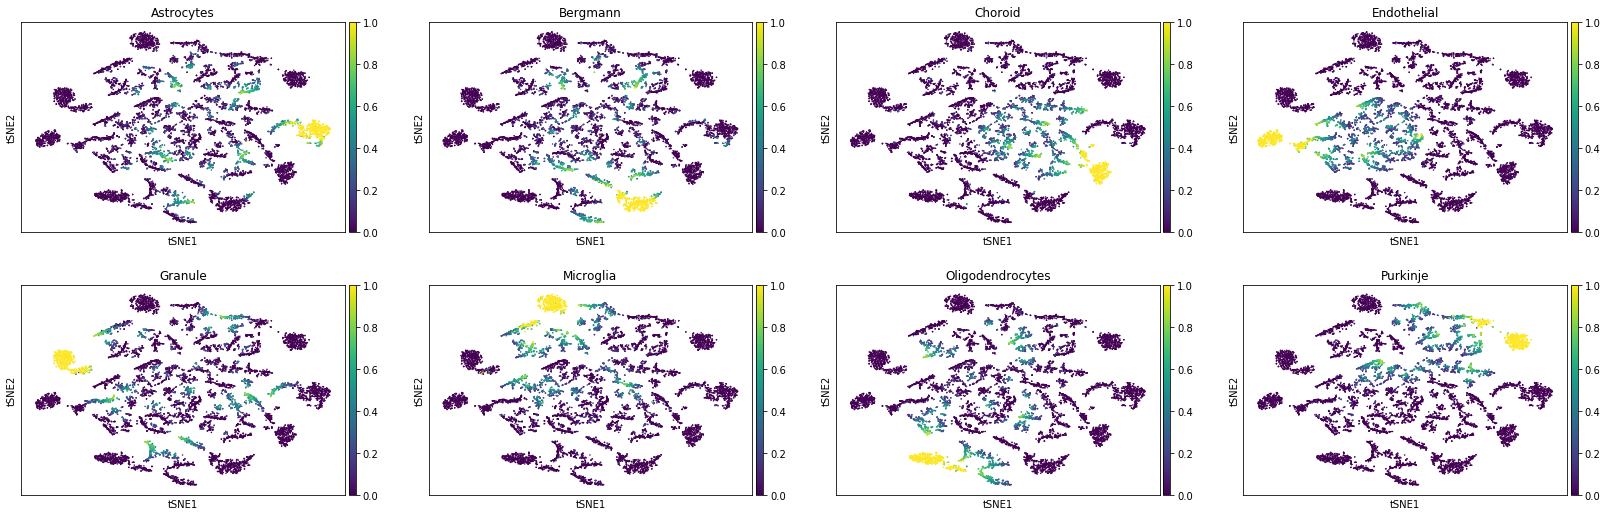

In [10]:
scle_z_kl = draw_batch(z_sim,z_sp,label_sim, label_sp, 'scle_z')

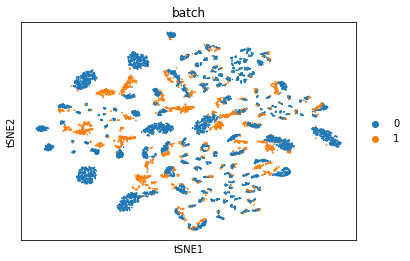

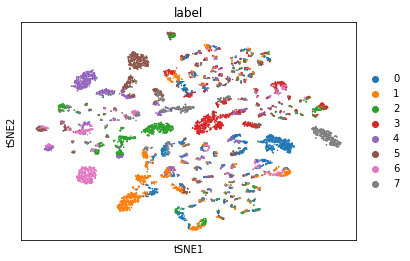

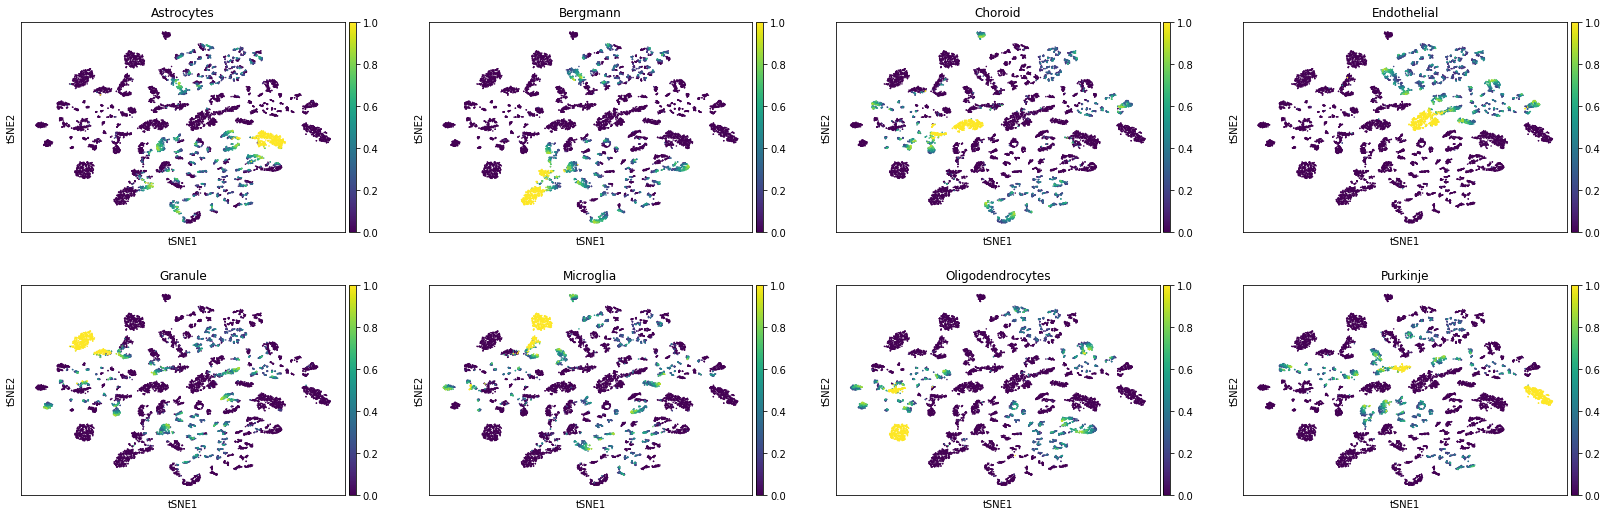

In [11]:
cellDART_z_kl = draw_batch(cellDART_zsim,cellDART_zsp,label_sim, label_sp, 'cellDART_z')

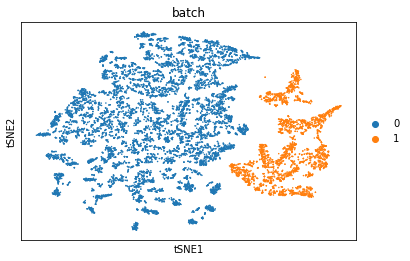

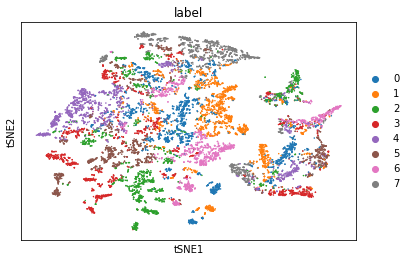

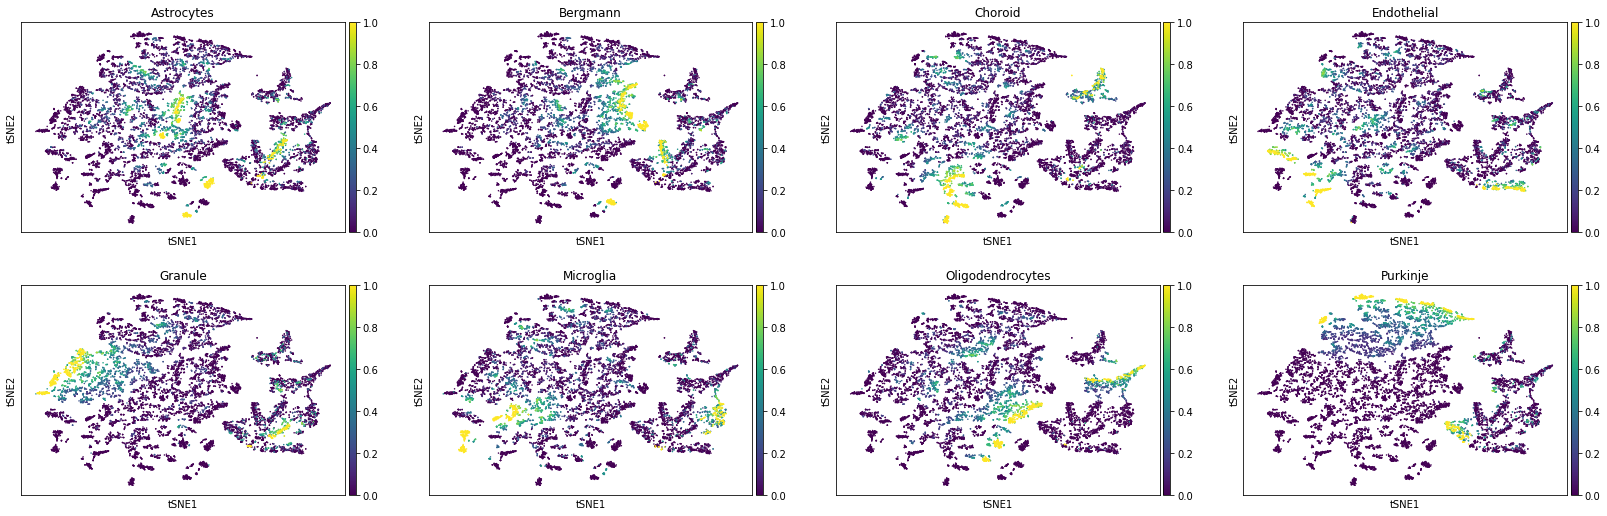

In [12]:
raw_kl = draw_batch(raw.X,raw_sp.X,label_sim, label_sp, 'raw')

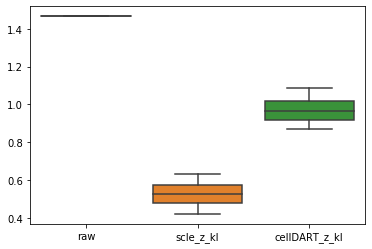

In [14]:
kl_df = pd.DataFrame({'raw':raw_kl, 
#                      'scle_kl':scle_kl,
#                      'cellDART_kl':cellDART_kl,
                     'scle_z_kl':scle_z_kl,
                     'cellDART_z_kl':cellDART_z_kl})
ax = sns.boxplot(data=kl_df)
plt.savefig('data/scsn/kl.pdf')

In [19]:
params_df = pd.read_csv('data/scsn/params.csv', index_col=0)
params_df

,lr,layers,dropout,rmse
209,0.10,"[512, 256, 128, 64]",0.9,0.075717
354,1.00,"[1024, 256, 64]",0.9,0.076686
234,0.10,"[512, 128, 64]",0.9,0.076773
329,1.00,"[1024, 512, 256, 128]",0.9,0.076928
299,0.40,"[512, 128, 64]",0.9,0.076947
...,...,...,...,...
156,0.01,"[1024, 256, 64]",0.3,0.271823
145,0.01,"[512, 128, 64, 32]",0.1,0.273102
211,0.10,"[512, 128, 64, 32]",0.3,0.274319
146,0.01,"[512, 128, 64, 32]",0.3,0.275200


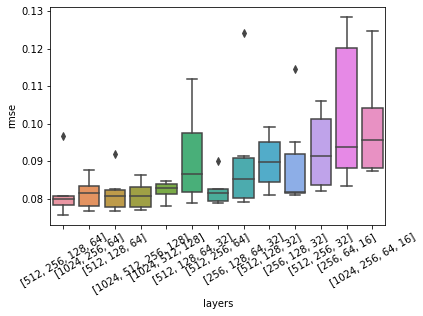

In [16]:
params_df = params_df[params_df['dropout']==0.9]
ax = sns.boxplot(y='rmse',x='layers', data=params_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.savefig('data/scsn/params_layer.pdf')

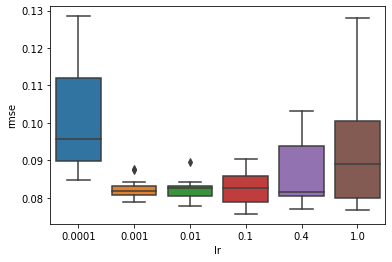

In [17]:
ax = sns.boxplot(y='rmse',x='lr', data=params_df)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.savefig('data/scsn/params_lr.pdf')

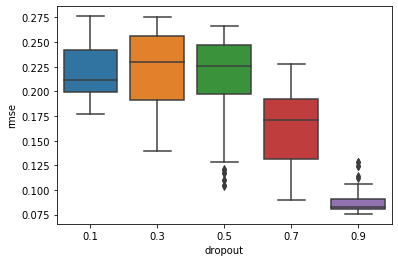

In [20]:
ax = sns.boxplot(y='rmse',x='dropout', data=params_df)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.savefig('data/scsn/dropout.pdf')